In [1]:
import numpy as np
from matplotlib.pyplot import *
import basic
import prjlib
import plottools as pl
import binning as bins
s = (180./np.pi)**2

In [2]:
def load_spectrum(bn,Lmin,Lsp=2048,doreal='False'):
    ps, __ = prjlib.filename_init(doreal=doreal,rlmin='200',dearot='True',qtagext='_oL3000')
    sn = 100
    mb, mb0, mb1 = prjlib.binning_all(bn,lmin=Lmin,Lsp=Lsp)
    scl = s*np.array([np.loadtxt(ps.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,sn+1)])
    vcl = np.std(scl,axis=0)
    sci = bins.binning(scl,mb0,mb1)
    vcb = np.std(sci,axis=0)
    ocl = s*np.loadtxt(ps.quad.f['EB'].ocls,unpack=True)[1]
    n0b = np.loadtxt(ps.quad.f['EB'].n0bl,unpack=True)[1]
    ocb = bins.binning(ocl,mb0,mb1)
    return mb.bc, ocb, vcb, ocl, vcl, n0b

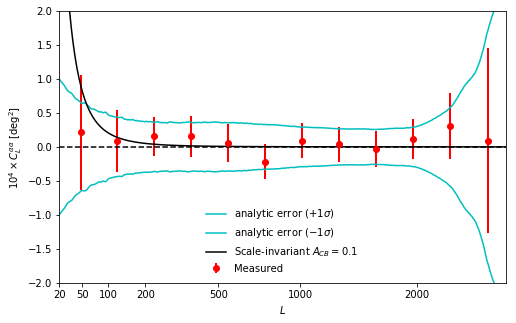

In [16]:
rcParams["figure.figsize"] = (8,5)
Lmin = 20
pl.plot_1dstyle(ylab=r'$10^4 \times C_L^{\alpha\alpha}$ [deg$^2$]',spc='p2',xmin=Lmin,xmax=3000,ymin=-2,ymax=2)
#pl.plot_1dstyle(ylab=r'$10^4 \times C_L^{\alpha\alpha}$ [deg$^2$]',spc='p2',xmin=Lmin,xmax=3000,ymin=-2,ymax=2)
a = 1e4
b, ocb, vcb, ocl, vcl, n0b = load_spectrum(12,Lmin,Lsp=3000,doreal='True')
errorbar(np.sqrt(b),a*ocb,yerr=a*vcb,fmt='o',label='Measured',color='r',lw=2)
x = np.arange(1,3001,1)
plot(np.sqrt(x),n0b[1:]*a*s/np.sqrt(x),label=r'analytic error ($+1\sigma$)',color='c')
plot(np.sqrt(x),-n0b[1:]*a*s/np.sqrt(x),label=r'analytic error ($-1\sigma$)',color='c')
ps, __ = prjlib.filename_init(rlmin='200',dearot='True')
plot(np.sqrt(x),2.*np.pi/x/(x+1.)*a*.1*1e-4*s,label=r'Scale-invariant $A_{CB}=0.1$',color='k')
legend(loc=0,frameon=False)
axhline(0,color='k',ls='--')
#axvline(np.sqrt(2048),color='k',ls='-.')
#savefig('fig_comparison.png')